This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Resources

[SKLearn Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[SKLearn Train Test Split Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[SKLearn Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[SKLearn Scoring Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Linear Regression

## Basics and Data Preparation

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Linear Regression:** `Your Answer Here`

**Polynomial Regression:** `Your Answer Here`

**Overfitting:** `Your Answer Here`

**Underfitting:** `Your Answer Here`

**Outlier:** `Your Answer Here`

**Categorical Encoding:** `Your Answer Here`

Use `auto_df` to complete the following.

In [2]:
columns = ['symboling','norm_loss','make','fuel','aspiration','doors',
           'bod_style','drv_wheels','eng_loc','wheel_base','length','width',
           'height','curb_weight','engine','cylinders','engine_size',
           'fuel_system','bore','stroke','compression','hp','peak_rpm',
           'city_mpg','hgwy_mpg','price']
auto_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
auto_df = pd.read_csv(auto_url, names=columns, header=None)

auto_df.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,...,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Perform a train test split on `auto_df`, your target feature is `price`

In [7]:
train, test = train_test_split(auto_df, test_size=0.2)

In [17]:
target = 'price'
y_train = train[target]
y_test = test[target]

X_train = train[auto_df.columns.drop(["price"]).tolist()]
X_test = test[auto_df.columns.drop(["price"]).tolist()]

It's always good to practice EDA, so explore the dataset with both explanatory statistics and visualizations.

In [18]:
X_train.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,...,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg
28,-1,110,dodge,gas,std,four,wagon,fwd,front,103.3,...,four,122,2bbl,3.34,3.46,8.5,88,5000,24,30
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
85,1,125,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,four,122,2bbl,3.35,3.46,8.5,88,5000,25,32
162,0,91,toyota,gas,std,four,sedan,fwd,front,95.7,...,four,98,2bbl,3.19,3.03,9.0,70,4800,28,34
158,0,91,toyota,diesel,std,four,sedan,fwd,front,95.7,...,four,110,idi,3.27,3.35,22.5,56,4500,34,36


In [30]:
X_train.describe(include="all")

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,...,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg
count,164.000000,164,164,164,164,164,164,164,164,164.000000,...,164,164.000000,164,164,164,164.000000,164,164,164.000000,164.000000
unique,NaN,48,22,2,2,3,5,3,2,NaN,...,7,NaN,8,37,35,NaN,57,24,NaN,NaN
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,four,NaN,mpfi,3.19,3.40,NaN,68,5500,NaN,NaN
freq,NaN,31,23,146,136,93,77,98,162,NaN,...,128,NaN,74,18,19,NaN,18,34,NaN,NaN
mean,0.817073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.803659,...,NaN,124.353659,NaN,NaN,NaN,10.353171,NaN,NaN,25.493902,31.012195
std,1.204573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920391,...,NaN,39.966972,NaN,NaN,NaN,4.158020,NaN,NaN,6.494450,6.725091
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,NaN,97.000000,NaN,NaN,NaN,8.675000,NaN,NaN,20.000000,25.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.100000,...,NaN,110.000000,NaN,NaN,NaN,9.000000,NaN,NaN,25.000000,30.500000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.500000


In [31]:
X_test.describe(include="all")

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,...,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg
count,41.000000,41,41,41,41,41,41,41,41,41.000000,...,41,41.000000,41,41,41,41.000000,41,41,41.000000,41.000000
unique,NaN,24,18,2,2,3,5,3,2,NaN,...,5,NaN,6,21,21,NaN,28,14,NaN,NaN
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,four,NaN,mpfi,3.62,3.86,NaN,70,4800,NaN,NaN
freq,NaN,10,9,39,32,21,19,22,40,NaN,...,31,NaN,20,9,4,NaN,4,11,NaN,NaN
mean,0.902439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.568293,...,NaN,137.121951,NaN,NaN,NaN,9.300000,NaN,NaN,24.121951,29.707317
std,1.410760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.485115,...,NaN,46.915453,NaN,NaN,NaN,3.016703,NaN,NaN,6.697743,7.494144
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.600000,...,NaN,70.000000,NaN,NaN,NaN,7.000000,NaN,NaN,14.000000,16.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.300000,...,NaN,108.000000,NaN,NaN,NaN,8.100000,NaN,NaN,19.000000,24.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.500000,...,NaN,130.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.200000,...,NaN,156.000000,NaN,NaN,NaN,9.300000,NaN,NaN,29.000000,34.000000


/home/alex/anaconda3/envs/geoprocessing/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


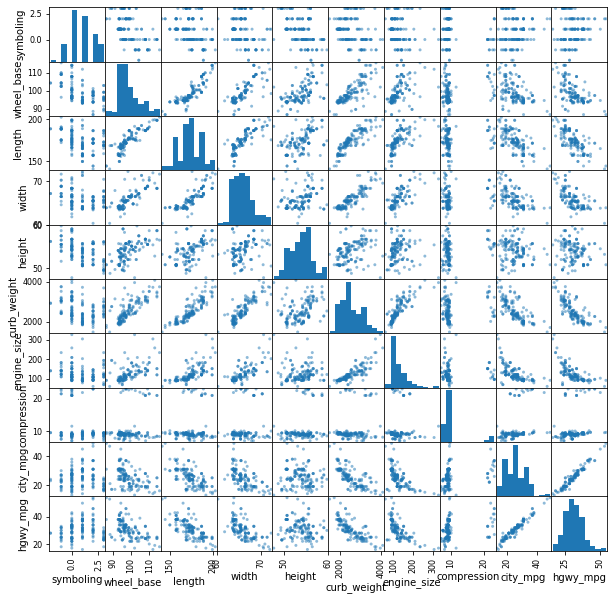

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
pd.plotting.scatter_matrix(X_train, ax=ax)
plt.show()

Check for nulls and then write a function to fill in null values. As you can see with `norm_loss`, some of the nulls have a placeholder value of `?` that will need to be addressed.

How does train test split address underfitting/overfitting?

`Your Answer Here`

What are three synonyms for the Y Variable?
- `Your Answer Here`
- `Your Answer Here`
- `Your Answer Here`

What are three synonyms for the X Variable(s)?
- `Your Answer Here`
- `Your Answer Here`
- `Your Answer Here`

One hot encode a categorical feature

Define the 5 versions of **Baseline**:
1. `Your Answer Here`
2. `Your Answer Here`
3. `Your Answer Here`
4. `Your Answer Here`
5. `Your Answer Here`

What is the purpose of getting a baseline that tells you what you would get with a guess? (Mean or Majority Classifier Baseline)

`Your Answer Here`

Get the mean baseline for the target feature. If you log transformed the target feature, get the mean baseline of the log transformed target feature.

## Modeling

What is the 5 step process for using the Scikit-learn's estimator API?
1. `Your Answer Here`
2. `Your Answer Here`
3. `Your Answer Here`
4. `Your Answer Here`
5. `Your Answer Here`

Follow the 5 steps to make a prediction on your test set. The functions and changes you made to `X_train` may need to be applied to `X_test` if you have not done so already.

In [ ]:
# Step 1 - Use Linear Regression

In [ ]:
# Step 2

In [ ]:
# Step 3

In [ ]:
# Step 4

In [ ]:
# Step 5

## Scoring

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Mean Absolute Error (MAE):** `Your Answer Here`

**Mean Squared Error (MSE):** `Your Answer Here`

**Root Mean Squared Error (RMSE):** `Your Answer Here`

**Coefficient of Determination ($R^2$):** `Your Answer Here`

**Residual Error:** `Your Answer Here`

**Bias:** `Your Answer Here`

**Variance:** `Your Answer Here`

**Validation Curve:** `Your Answer Here`

**Ordinary Least Squares:** `Your Answer Here`

**Ridge Regression:** `Your Answer Here`

In a short paragraph, explain the Bias-Variance Tradeoff

```
Your Answer Here
```

Use each of the regression metrics (MAE, MSE, RMSE, and $R^2$) on both the mean baseline and your predictions.

In [ ]:
# MAE

In [ ]:
# MSE

In [ ]:
# RMSE

In [ ]:
# R^2

Print and plot the coefficients of your model.

In [ ]:
# Print the coefficients

In [ ]:
# Plot the coefficients

Interpret your results with a short paragraph. How well did your model perform? How do you read a single prediction? Did you beat the baseline? 

```
Your Answer Here
```

Use Ridge Regression and get the $R^2$ score

How does the ridge regression score compare to your linear regression and baseline scores?

```
Your Answer Here
```

# Logistic Regression

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Logistic Regression:** `Your Answer Here`

**Majority Classifier:** `Your Answer Here`

**Validation Set:** `Your Answer Here`

**Accuracy:** `Your Answer Here`

**Feature Selection:** `Your Answer Here`

Answer each of the following questions with no more than a short paragraph.
<br/><br/>

What is the difference between linear regression and logistic regression?
```
Your Answer Here
```

What is the purpose of having a validation set?
```
Your Answer Here
```

Can we use MAE, MSE, RMSE, and $R^2$ to score a Logistic Regression model? Why or why not? If not, how do we score Logistic Regression models?
```
Your Answer Here
```

Use the Titanic dataset below to predict whether passengers survived or not. Try to avoid looking at the work you did during the lecture.

Make sure to do the following but feel free to do more:
- Train/Test/Validation Split
- Majority Classifier Baseline
- Include at least 2 features in X (Stretch, try K-Best)
- Use Logistic Regression
- Score your model's accuracy against the Majority Classifier Baseline
 - If you did not beat the baseline, tweak your model until it exceeds the baseline
- Score your model on the validation set

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

train = pd.read_csv(DATA_PATH+'titanic/train.csv')
test = pd.read_csv(DATA_PATH+'titanic/test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
